#setup -from rat bmi paper

In [33]:
# Import required libraries
import os
os.chdir('/home/bsleger/bsl/CrossSpeciesBMI')
import sys
import ndex2
from getpass import getpass
import pandas as pd
import mygene
mg = mygene.MyGeneInfo()
from netcoloc import netprop_zscore, netprop
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3
import ddot

In [34]:
path="/home/bsleger/bsl/rare_common_alcohol/"

In [35]:
# Set up directory paths. Defaults to the Data/ and Figures/ folders within the repository.
#cwd = os.path.dirname('/home/bsleger/bsl/CrossSpeciesBMI')
DATADIR = os.path.join(path)
FIGDIR = os.path.join(path, "figures/")

In [36]:
# Import functions specific to this study
os.chdir('/home/bsleger/bsl/CrossSpeciesBMI')
from updated_netcoloc_functions import *
from analysis_functions import *
from plotting_functions import *

In [84]:
UUID_tag={
    'pcnet_v14':'_',
    'pcnet_v13':'_pcnet_v13',
    'string':'_string',
    'humanNet_v3_FN': '_humanNet_v3_FN'
}
interactome_name='pcnet_v14'

In [38]:
rare_datasets=pd.read_csv(path+'rare_datasets.csv')
common_datasets=pd.read_csv(path+'common_datasets.csv')

In [39]:
rare_datasets

,label,cutoff used,seed_path,delim,zscore_file,zscore_path,seed_gene_name,phenotype_group
0,rare_strin_allcut_alcoholintake,burden bonferroni < 0.05 in the whole table of...,rare_variant_genebass/alcohol_intake/alcohol_i...,comma,rare_strin_allcut_alcoholintake_zscore.tsv,network_scores/rare_strin_allcut_alcoholintake...,gene_symbol,alcohol
1,alcoholintake_FDR_25,all tests FDR < 0.25 in the whole table of gen...,rare_variant_genebass/alcohol_intake/alcohol_i...,comma,alcoholintake_FDR_25_zscore.tsv,network_scores/alcoholintake_FDR_25_zscore.tsv,Gene Name,alcohol
2,alcoholintake_FDR_10,all tests FDR < 0.10 in the whole table of gen...,rare_variant_genebass/alcohol_intake/alcohol_i...,comma,alcoholintake_FDR_10_zscore.tsv,network_scores/alcoholintake_FDR_10_zscore.tsv,Gene Name,alcohol
3,rare_neale_50_irnt_FDR_25,all tests FDR <0.25,rare_variant_genebass/50_irnt/50_irnt_25FDR.tsv,tab,rare_neale_50_irnt_FDR_25_zscore.tsv,network_scores/rare_neale_50_irnt_FDR_25_zscor...,Gene Name,control
4,rare_neale_20153_irnt_FDR_25,all tests FDR <0.25,rare_variant_genebass/20153_irnt/20153_irnt_25...,tab,rare_neale_20153_irnt_FDR_25_zscore.tsv,network_scores/rare_neale_20153_irnt_FDR_25_zs...,Gene Name,control
5,rare_neale_30110_irnt_FDR_25,all tests FDR <0.25,rare_variant_genebass/30110_irnt/30110_irnt_25...,tab,rare_neale_30110_irnt_FDR_25_zscore.tsv,network_scores/rare_neale_30110_irnt_FDR_25_zs...,Gene Name,control
6,rare_neale_50_irnt_bonf_05,all tests bonferroni <0.05,rare_variant_genebass/50_irnt/50_irnt_bonf_all...,tab,rare_neale_50_irnt_bonf_05_zscore.tsv,network_scores/rare_neale_50_irnt_bonf_05_zsco...,Gene Name,control
7,rare_neale_20153_irnt_bonf_05,all tests bonferroni <0.05,rare_variant_genebass/20153_irnt/20153_irnt_bo...,tab,rare_neale_20153_irnt_bonf_05_zscore.tsv,network_scores/rare_neale_20153_irnt_bonf_05_z...,Gene Name,control
8,rare_neale_30110_irnt_bonf_05,all tests bonferroni <0.05,rare_variant_genebass/30110_irnt/30110_irnt_bo...,tab,rare_neale_30110_irnt_bonf_05_zscore.tsv,network_scores/rare_neale_30110_irnt_bonf_05_z...,Gene Name,control
9,rare_neale_50_irnt_bonf_burden_05,burden test bonferroni <0.05,rare_variant_genebass/50_irnt/50_irnt_burden_b...,tab,rare_neale_50_irnt_bonf_burden_05_zscore.tsv,network_scores/rare_neale_50_irnt_bonf_burden_...,Gene Name,control


In [40]:
common_datasets

,group,snp2gene_method,label,phenotype_group,seed_path,delim,zscore_file,zscore_path,seed_p,seed_gene_name,description,cutoff
0,AUD_1M,pascal,AUD_1M_pascal,alcohol,AUD_1M_mutiancestry/pascal/PAU_EUR_20211210_sn...,tab,AUD_1M_pascal_zscore.tsv,network_scores/AUD_1M_pascal_zscore.tsv,pvalue,gene_symbol,AUD,bonferroni
1,GSCAN_CigDay,magma,GSCAN_CigDay_magma,tobacco,GSCAN_DPW/gscan_dpw_magma_genes.tsv,tab,GSCAN_CigDay_MAGMA_zscore.tsv,network_scores/GSCAN_CigDay_MAGMA_zscore.tsv,P,SYMBOL,cigarettes_per_day,bonferroni
2,GSCAN_CigDay,pascal,GSCAN_CigDay_pascal,tobacco,GSCAN_CigDay/GSCAN_CigDay_2022_GWAS_SUMMARY_ST...,tab,GSCAN_CigDay_pascal_zscore.tsv,network_scores/GSCAN_CigDay_pascal_zscore.tsv,pvalue,gene_symbol,cigarettes_per_day,bonferroni
3,GSCAN_CigDay,predixcan,GSCAN_CigDay_predixcan,tobacco,GSCAN_smkinit/GSCAN_SmkInit_SPrediXcan_results...,tab,GSCAN_CigDay_predixcan_zscore.tsv,network_scores/GSCAN_CigDay_predixcan_zscore.tsv,P,GENE_NAME,cigarettes_per_day,bonferroni
4,GSCAN_DPW,magma,GSCAN_DPW_magma,alcohol,GSCAN_DPW/GSCAN_DPW_magma_results.csv,comma,GSCAN_DPW_MAGMA_zscore.tsv,network_scores/GSCAN_DPW_MAGMA_zscore.tsv,P,GENE_NAME,drinks_per_week_gscan,bonferroni
5,GSCAN_DPW,pascal,GSCAN_DPW_pascal,alcohol,GSCAN_DPW/GSCAN_DrnkWk_2022_GWAS_SUMMARY_STATS...,tab,GSCAN_DrnkWk_pascal_zscore.tsv,network_scores/GSCAN_DrnkWk_pascal_zscore.tsv,pvalue,gene_symbol,drinks_per_week_gscan,bonferroni
6,GSCAN_DPW,predixcan,GSCAN_DPW_predixcan,alcohol,GSCAN_DPW/SPrediXcan_dpw.out,tab,GSCAN_DPW_predixcan_zscore.tsv,network_scores/GSCAN_DPW_predixcan_zscore.tsv,P,GENE_NAME,drinks_per_week_gscan,bonferroni
7,GSCAN_DPW,lead_snp_nearest_gene,GSCAN_DPW_nearestgene,alcohol,GSCAN_DPW/FUMA_lead_snp_genes.tsv,tab,GSCAN_DPW_nearestgene_zscore.tsv,network_scores/GSCAN_DPW_nearestgene_zscore.tsv,p,nearestGene,drinks_per_week_gscan,lead_snps
8,GSCAN_SmkInit,pascal,GSCAN_SmkInit_pascal,tobacco,GSCAN_smkinit/GSCAN_SmkInit_2022_GWAS_SUMMARY_...,tab,GSCAN_SmkInit_pascal_zscore.tsv,network_scores/GSCAN_SmkInit_pascal_zscore.tsv,pvalue,gene_symbol,ever_regular_smoker,bonferroni
9,GSCAN_SmkInit,magma,GSCAN_SmkInit_magma,tobacco,GSCAN_smkinit/gscan_smkinit_magma_genes.tsv,tab,GSCAN_SmkInit_magma_zscore.tsv,network_scores/GSCAN_SmkInit_magma_zscore.tsv,P,SYMBOL,ever_regular_smoker,bonferroni


In [108]:
row_rare=33 #1
rare_label=rare_datasets['label'][row_rare]
print('rare dataset:   '+rare_label)
row_common=30 #4 #7
common_label=common_datasets['label'][row_common]
print('common dataset:   '+common_label)

rare dataset:   alcoholintake_FDR_25_ADH1C_gene_removed
common dataset:   GSCAN_DPW_magma_ADH1C_gene_removed


In [109]:
if (rare_datasets['delim'][row_rare]==('comma')):
    seed_rare=pd.read_csv((path+rare_datasets['seed_path'][row_rare]),sep=",")
else:    
    seed_rare=pd.read_csv((path+rare_datasets['seed_path'][row_rare]),sep="\t")

seed_rare_ls=list(set(seed_rare[rare_datasets['seed_gene_name'][row_rare]]))

In [110]:
if (common_datasets['delim'][row_common]==('comma')):
    seed_common=pd.read_csv((path+common_datasets['seed_path'][row_common]),sep=",")
else:    
    seed_common=pd.read_csv((path+common_datasets['seed_path'][row_common]),sep="\t")

if common_datasets['cutoff'][row_common]=='bonferroni':
    seed_common=seed_common[seed_common[common_datasets['seed_p'][row_common]]<0.05/len(seed_common)]
seed_common_ls=list(set(seed_common[common_datasets['seed_gene_name'][row_common]]))

In [111]:
set(seed_common_ls).intersection(seed_rare_ls)

{'ADH1B', 'GCKR'}

In [89]:
zscore_rare

0
C8orf88    0.166400
GRXCR2     1.741690
C4orf36   -0.717413
SAMD15     0.201734
PATE4     -0.292105
             ...   
PFKP      -0.060853
PFKM       0.027390
PFKL       0.000385
TGFBR2    -0.517760
TGFBR1    -0.476186
Name: 1, Length: 18459, dtype: float64

In [112]:
if interactome_name=='pcnet_v14':
    zscore_common_df=pd.read_csv(path+"/"+common_datasets['zscore_path'][row_common],header=None, sep='\t')
else:
    z_path=common_datasets['zscore_path'][row_common]
    z_path_head=z_path[0:len(z_path)-11:1]
    z_path_tail=z_path[len(z_path)-11:len(z_path):1]
    zscore_common_df=pd.read_csv(path+"/"+z_path_head+'_'+interactome_name+z_path_tail,header=None, sep='\t')

zscore_common_df.index=zscore_common_df[0]
zscore_common_df=zscore_common_df.drop(columns=[0])
zscore_common=zscore_common_df[1].squeeze()
zscore_common_df = pd.DataFrame({'z':zscore_common})

In [113]:
if interactome_name=='pcnet_v14':
    zscore_rare_df=pd.read_csv(path+"/"+rare_datasets['zscore_path'][row_rare],header=None, sep='\t')
else:
    z_path=rare_datasets['zscore_path'][row_rare]
    z_path_head=z_path[0:len(z_path)-11:1]
    z_path_tail=z_path[len(z_path)-11:len(z_path):1]
    zscore_rare_df=pd.read_csv(path+"/"+z_path_head+'_'+interactome_name+z_path_tail,header=None, sep='\t')

zscore_rare_df.index=zscore_rare_df[0]
zscore_rare_df=zscore_rare_df.drop(columns=[0])
zscore_rare=zscore_rare_df[1].squeeze()
zscore_rare_df = pd.DataFrame({'z':zscore_rare})

In [92]:
#pcnet v1.4- used for prior analysis
#pcnet v1.3- used for rat bmi network
UUIDs= {
    'pcnet_v14':'c3554b4e-8c81-11ed-a157-005056ae23aa',
    'pcnet_v13':'4de852d9-9908-11e9-bcaf-0ac135e8bacf',
    'string':'98ba6a19-586e-11e7-8f50-0ac135e8bacf',
    'humanNet_v3_FN': '40913318-3a9c-11ed-ac45-0ac135e8bacf'
}

In [93]:
#load interactome
interactome_uuid=UUIDs[interactome_name]
print(interactome_name)
ndex_server='public.ndexbio.org'
ndex_user=None
ndex_password=None
G_PC = ndex2.create_nice_cx_from_server(
            ndex_server, 
            username=ndex_user, 
            password=ndex_password, 
            uuid=interactome_uuid
        ).to_networkx()
#relabel the nodes with the gene name instead of an arbitrary number
if (interactome_name=='pcnet_v14'):
    G_PC=nx.relabel_nodes(G_PC, nx.get_node_attributes(G_PC, 'HGNC Symbol'))
pcnet_nodes = list(G_PC.nodes)
# print out interactome num nodes and edges for diagnostic purposes
print('number of nodes:')
print(len(G_PC.nodes))
print('\nnumber of edges:')
print(len(G_PC.edges))

pcnet_v14
number of nodes:
18630

number of edges:
2687393


In [114]:
seed_rare_ls=list(set(seed_rare_ls).intersection(pcnet_nodes))
seed_common_ls=list(set(seed_common_ls).intersection(pcnet_nodes))

In [115]:
# Generate a null distribution of colocalized network size by shuffling the z_scores and applying the thresholds:
# NPS_r > 1, NPS_h > 1, NPS_hr > 3
observed_sz, permuted_sz = calculate_expected_overlap(zscore_common_df, zscore_rare_df, 
                                                            z_score_threshold=3, z1_threshold=1.0,
                                                            z2_threshold=1.0, num_reps=10000, plot=False, 
                                                            overlap_control="bin",
                                                            seed1=seed_common_ls, seed2=seed_rare_ls)

Overlap seed genes: 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:41<00:00, 62.08it/s]


In [78]:
FIGDIR

'/home/bsleger/bsl/rare_common_alcohol/figures/'

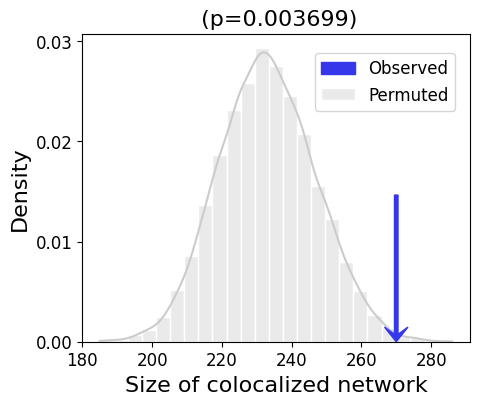

In [116]:
plot_permutation_histogram(permuted_sz, observed_sz,'', 'Size of colocalized network', color="#cccccc",
                          arrow_color="#3636eb")

#plt.savefig(FIGDIR + rare_label+"_"+common_label+"netcoloc_size_histogram_500dpi.png",dpi=500, bbox_inches="tight")
plt.savefig(FIGDIR + rare_label+"_"+common_label+UUID_tag[interactome_name]+"netcoloc_size_histogram.svg", bbox_inches="tight")


In [118]:
rare_label

'alcoholintake_FDR_25_ADH1C_gene_removed'

In [119]:
common_label

'GSCAN_DPW_magma_ADH1C_gene_removed'

In [107]:
FIGDIR + rare_label+"_"+common_label+UUID_tag[interactome_name]+"netcoloc_size_histogram.svg"

'/home/bsleger/bsl/rare_common_alcohol/figures/alcoholintake_FDR_25_ADH1BC_gene_removed_GSCAN_DPW_magma_ADH1BC_gene_removed_netcoloc_size_histogram.svg'

In [91]:
# Generate a null distribution of mean NPS by shuffling the z_scores. Note, due to randomization this distribution will not be exactly the same as the reported result
observed_net, permuted_net = calculate_mean_z_score_distribution(zscore_common_df, zscore_rare_df, num_reps=10000,
                                                        zero_double_negatives=False, overlap_control="bin",
                                                        seed1=seed_common_ls, seed2=seed_rare_ls)

Overlap seed genes: 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 241.34it/s]


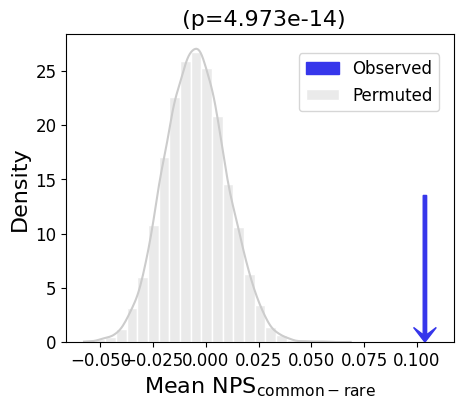

In [92]:
plot_permutation_histogram(permuted_net, observed_net,'', 'Mean $NPS_{common-rare}$',color="#cccccc",arrow_color="#3636eb")
plt.savefig(FIGDIR + rare_label+"_"+common_label+UUID_tag[interactome_name]+"mean_NPS_histogram.svg", bbox_inches="tight")
